## Titanic Data Analysis

In [52]:
#To predict if passengers on the titanic survived or not

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [54]:
titanic_data = pd.read_csv("titanic.csv")

### Check dimensions of the dataset

In [55]:
titanic_data.shape

(1309, 14)

### Check the different variables and types contained in the data

In [56]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


### Inspect the First Five Records of the dataset

In [57]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Run Summary Statistics on the Numerical Columns in the dataset

In [58]:
titanic_data.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


### Run Summary Statistics on the Categorical Columns in the dataset

In [59]:
categorical_data = titanic_data.dtypes[titanic_data.dtypes == "object"].index
titanic_data[categorical_data].describe()

,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309
unique,1307,2,99,929,282,187,4,28,122,370
top,"Connolly, Miss. Kate",male,?,CA. 2343,8.05,?,S,?,?,?
freq,2,843,263,11,60,1014,914,823,1188,564


### Remove unecessary columns from the dataset

In [60]:
del titanic_data["home.dest"]

#### Take a deep look into individual columns to see if relevant for the prediction

In [61]:
sorted(titanic_data["name"])[0:17]   #check the first 17 names

['Abbing, Mr. Anthony',
 'Abbott, Master. Eugene Joseph',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelseth, Miss. Karen Marie',
 'Abelseth, Mr. Olaus Jorgensen',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Abrahamsson, Mr. Abraham August Johannes',
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Master. Philip Frank',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Aldworth, Mr. Charles Augustus']

In [62]:
titanic_data["name"].describe()

count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: name, dtype: object

In [63]:
titanic_data["ticket"][0:17]         #check the first 17 tickets

0        24160
1       113781
2       113781
3       113781
4       113781
5        19952
6        13502
7       112050
8        11769
9     PC 17609
10    PC 17757
11    PC 17757
12    PC 17477
13       19877
14       27042
15    PC 17318
16    PC 17558
Name: ticket, dtype: object

In [64]:
titanic_data["ticket"].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [65]:
del titanic_data["ticket"]        # Remove Ticket

In [66]:
titanic_data["cabin"][0:17]         #check the first 17 cabins

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
9           ?
10    C62 C64
11    C62 C64
12        B35
13          ?
14        A23
15          ?
16    B58 B60
Name: cabin, dtype: object

In [67]:
titanic_data["cabin"].describe()

count     1309
unique     187
top          ?
freq      1014
Name: cabin, dtype: object

### Data Transformation

In [68]:
survived_data = pd.Categorical(titanic_data["survived"]) # convert to a categorical data
survived_data = survived_data.rename_categories(["Died", "Survived"])
survived_data.describe()

,counts,freqs
categories,,
Died,809,0.618029
Survived,500,0.381971


In [69]:
Pclass_data = pd.Categorical(titanic_data["pclass"], ordered=True) # convert to a categorical ordered data
Pclass_data.describe()

,counts,freqs
categories,,
1,323,0.246753
2,277,0.211612
3,709,0.541635


In [70]:
Pclass_data = Pclass_data.rename_categories(["Class1", "Class2", "Class3"])
Pclass_data.describe()

,counts,freqs
categories,,
Class1,323,0.246753
Class2,277,0.211612
Class3,709,0.541635


In [71]:
titanic_data["pclass"] = Pclass_data

In [72]:
titanic_data["survived"] = survived_data

In [73]:
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
0,Class1,Survived,"Allen, Miss. Elisabeth Walton",female,29,0,0,211.3375,B5,S,2,?
1,Class1,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.55,C22 C26,S,11,?
2,Class1,Died,"Allison, Miss. Helen Loraine",female,2,1,2,151.55,C22 C26,S,?,?
3,Class1,Died,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.55,C22 C26,S,?,135
4,Class1,Died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,151.55,C22 C26,S,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Class3,Died,"Zabour, Miss. Hileni",female,14.5,1,0,14.4542,?,C,?,328
1305,Class3,Died,"Zabour, Miss. Thamine",female,?,1,0,14.4542,?,C,?,?
1306,Class3,Died,"Zakarian, Mr. Mapriededer",male,26.5,0,0,7.225,?,C,?,304
1307,Class3,Died,"Zakarian, Mr. Ortin",male,27,0,0,7.225,?,C,?,?


In [74]:
titanic_data["cabin"].unique() # check the unique cabins 

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', '?', 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

### Group cabin variable to reduce number of unique values

In [75]:
cabin_char = titanic_data["cabin"].astype(str) # convert data to string
cabin_data = np.array([cabin[0] for cabin in cabin_char]) # Take the first character of the string
cabin_data = pd.Categorical(cabin_data)
cabin_data.describe()

,counts,freqs
categories,,
?,1014,0.774637
A,22,0.016807
B,65,0.049656
C,94,0.071811
D,46,0.035141
E,41,0.031322
F,21,0.016043
G,5,0.003820
T,1,0.000764


In [76]:
titanic_data["cabin"] = cabin_data

In [77]:
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
0,Class1,Survived,"Allen, Miss. Elisabeth Walton",female,29,0,0,211.3375,B,S,2,?
1,Class1,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.55,C,S,11,?
2,Class1,Died,"Allison, Miss. Helen Loraine",female,2,1,2,151.55,C,S,?,?
3,Class1,Died,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.55,C,S,?,135
4,Class1,Died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,151.55,C,S,?,?
5,Class1,Survived,"Anderson, Mr. Harry",male,48,0,0,26.55,E,S,3,?
6,Class1,Survived,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,77.9583,D,S,10,?
7,Class1,Died,"Andrews, Mr. Thomas Jr",male,39,0,0,0,A,S,?,?
8,Class1,Survived,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,51.4792,C,S,D,?
9,Class1,Died,"Artagaveytia, Mr. Ramon",male,71,0,0,49.5042,?,C,?,22


### Take care of missing values

In [78]:
missing_age = np.where(titanic_data["age"] == "?")
missing_age # places where age variable is a question mark

(array([  15,   37,   40,   46,   59,   69,   70,   74,   80,  106,  107,
         108,  118,  121,  125,  134,  147,  152,  157,  166,  176,  179,
         184,  196,  204,  219,  223,  235,  237,  241,  254,  256,  269,
         277,  283,  293,  297,  318,  320,  363,  382,  384,  410,  469,
         473,  477,  483,  491,  495,  524,  528,  531,  581,  595,  597,
         672,  680,  681,  682,  705,  706,  756,  757,  767,  768,  775,
         789,  795,  798,  800,  801,  802,  804,  805,  808,  812,  813,
         815,  816,  819,  835,  842,  843,  852,  854,  856,  858,  865,
         871,  872,  874,  876,  879,  882,  886,  887,  900,  901,  902,
         903,  918,  920,  921,  922,  923,  926,  927,  928,  929,  930,
         931,  940,  942,  944,  945,  946,  948,  954,  955,  956,  957,
         958,  961,  962,  971,  973,  976,  982,  983,  984,  987,  988,
         989,  991,  993,  994,  997,  998,  999, 1000, 1001, 1002, 1003,
        1004, 1005, 1006, 1009, 1012, 

In [79]:
#Before we can set all ages to a central number like the median we need to look at the distribution of ages by creating a histogram

array([[<Axes: title={'center': 'age'}>]], dtype=object)

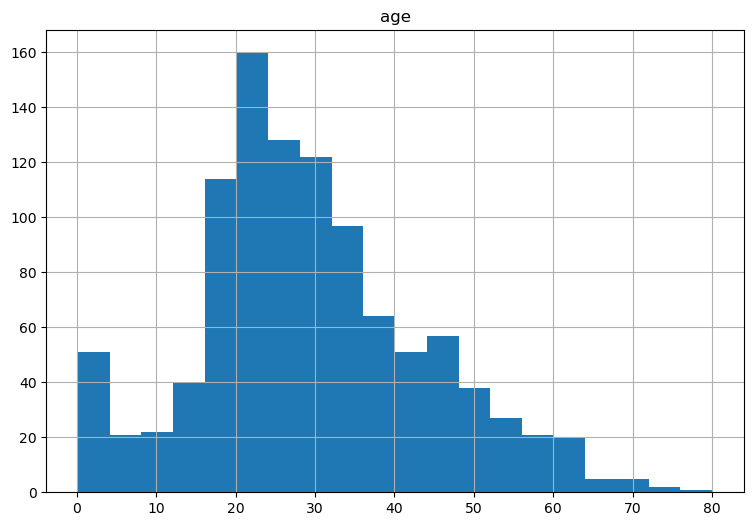

In [85]:
titanic_data['age'] = pd.to_numeric(titanic_data['age'], errors='coerce') #convert age column to a numeric column
titanic_data.hist(column='age',figsize=(9,6), bins=20) # Create a histogram to check for age distribution


In [88]:
#data follows a normal pattern hence we can use a middle value to fill up the missing ages
titanic_data["age"].median()


28.0

In [89]:
 new_age = np.where(titanic_data["age"].isnull(), 28, titanic_data["age"]) # Replace null with median value
titanic_data["age"] = new_age
titanic_data["age"].describe()

count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

array([[<Axes: title={'center': 'age'}>]], dtype=object)

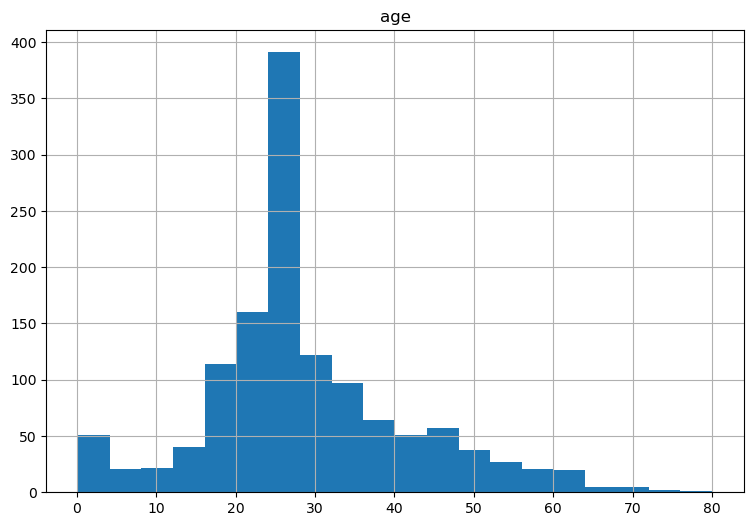

In [91]:
titanic_data.hist(column='age',figsize=(9,6), bins=20) #Redrawn histogram

### Handling Outliers

<Axes: >

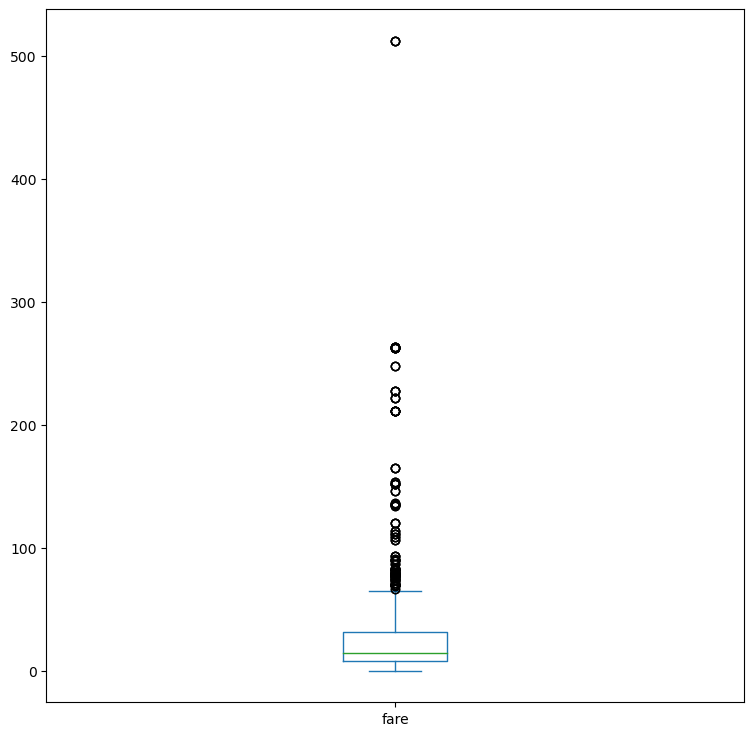

In [93]:
titanic_data['fare'] = pd.to_numeric(titanic_data['fare'], errors='coerce')
titanic_data["fare"].plot(kind="box", figsize=(9,9))

In [94]:
#green line is median value. Blue box contains middle 50% of values. Circles way above box represent outliers

max_fare_index = np.where(titanic_data["fare"] == max(titanic_data["fare"])) #find people who paid maximum high fees
titanic_data.loc[max_fare_index]

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
49,Class1,Survived,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C,3,?
50,Class1,Survived,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B,C,3,?
183,Class1,Survived,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C,3,?
302,Class1,Survived,"Ward, Miss. Anna",female,35.0,0,0,512.3292,?,C,3,?


### Creating new variables

In [95]:
titanic_data["Family"] = titanic_data["sibsp"] + titanic_data["parch"]

In [96]:
most_family = np.where(titanic_data["Family"] == max(titanic_data["Family"]))
titanic_data.loc[most_family]

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,Family
1170,Class3,Died,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,?,S,?,?,10
1171,Class3,Died,"Sage, Master. William Henry",male,14.5,8,2,69.55,?,S,?,67,10
1172,Class3,Died,"Sage, Miss. Ada",female,28.0,8,2,69.55,?,S,?,?,10
1173,Class3,Died,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,?,S,?,?,10
1174,Class3,Died,"Sage, Miss. Dorothy Edith 'Dolly'",female,28.0,8,2,69.55,?,S,?,?,10
1175,Class3,Died,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,?,S,?,?,10
1176,Class3,Died,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,?,S,?,?,10
1177,Class3,Died,"Sage, Mr. Frederick",male,28.0,8,2,69.55,?,S,?,?,10
1178,Class3,Died,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,?,S,?,?,10
1179,Class3,Died,"Sage, Mr. John George",male,28.0,1,9,69.55,?,S,?,?,10
